# This notebook contains testing the model and training it with the Lung Cancer Dataset

In [1]:
%load_ext autoreload
%autoreload 2

### Imports:

In [2]:
# Dataset imports:
from data.dataset import LungCancerDataset

# Model imports:
from model import *

# Custom transforms:
from custom_transforms import *

# PyTorch imports:
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import Subset, DataLoader
from torchvision import transforms as T

# Training and evaluation imports:
from train import train
from evaluate import evaluate

# Plotting imports:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# NumPy imports:
import numpy as np

# General imports:
import os
import json
import math

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

### Getting the device the model will be trained on:

In [4]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
    print(f'Using: {torch.cuda.get_device_name(0)}')
device

Using: NVIDIA GeForce GTX 1060 6GB


'cuda'

# Defining the image preprocessing:

### 1) Getting the mean and standard deviation from the data_stats.txt file in order to normalize the data:

In [5]:
# Getting the path of the data_stats.txt:
data_stats_file_name = 'data_stats.txt'
stats_path = os.path.join(os.getcwd(), 'data', data_stats_file_name)

# Loading the data_stats.txt:
with open(stats_path, 'r') as stats_file:
    data_stats = json.loads(stats_file.read())
    # Retrieving the mean and std:
    mean = data_stats['mean']
    std = data_stats['std']

print(f'Mean:\t\t\t{mean}\nStandard deviation:\t{std}')

Mean:			[0.11796081291735172, 0.11795355656445027, 0.11796993353068828]
Standard deviation:	[0.11499656715377173, 0.11499110442454794, 0.11500358942643818]


### 2) Defining the dataset transform that will be used on the whole dataset:

In [6]:
image_dim = (600, 800) # 360, 512

sharpness_factor = 5.0
sharpen = Sharpen(sharpness_factor=sharpness_factor)
blur = Blur(kernel_size=5)
transform = T.Compose([T.ToTensor(),
                       sharpen,
                       T.Normalize(mean=mean, std=std),
                       T.Resize(image_dim)])


# Overfitting Experiment:
### In this experiment an instance of the model will be overfit with a subsample of the training data to see if the model can learn from the data

### Creating the training set:

In [82]:
overfit_train = LungCancerDataset(transform=transform)

### Creating a subset of the original training set:

In [83]:
subset_size = 100
# Creating the indecies of the images that will be taken as a subset from the original training set:
subset_indecies = np.random.choice(list(range(len(overfit_train))), subset_size, replace=False)
# Creating the train sub set
overfit_train_subset = Subset(overfit_train, subset_indecies)

### Creating the training DataLoader object:

In [84]:
num_workers = 4
overfit_train_loader = DataLoader(overfit_train_subset, shuffle=True, batch_size=32, num_workers=num_workers)

## Training the model:

### Creating the model:

In [10]:
# The goal of this experiment is to evaluate the learning ability of the model, that is why no regularization
# is added, i.e., the dropout probability is set to 0.0.
overfit_model = LungCancerModel(dropout_prob=0.0)

### Setting up the training routine:

In [11]:
# --- Defining the optimizer: ---------------------------------------------------------------
learning_rate = 5e-4
momentum = 0.9
optimizer = optim.SGD(params=overfit_model.parameters(), lr=learning_rate, momentum=momentum)

# --- Defining the loss function: -----------------------------------------------------------
criterion = nn.CrossEntropyLoss()

### Defining the number of epochs:

In [12]:
epochs = 16

## Starting the training:

In [14]:
total_loss, train_accuracies, _ = train(model=overfit_model,
                                        train_loader=overfit_train_loader,
                                        validation_loader=overfit_train_loader,
                                        optimizer=optimizer,
                                        criterion=criterion,
                                        epochs=epochs,
                                        verbose=True)

  0%|          | 0/16 [00:00<?, ?it/s]

Evaluating the current epoch...


  6%|▋         | 1/16 [00:19<04:46, 19.11s/it]

Epoch: 0 | Loss: 5.31 | Train accuracy: 35.00% | Validation accuracy 35.00%
Evaluating the current epoch...


 12%|█▎        | 2/16 [00:36<04:11, 17.96s/it]

Epoch: 1 | Loss: 14.76 | Train accuracy: 65.00% | Validation accuracy 65.00%
Evaluating the current epoch...


 19%|█▉        | 3/16 [00:53<03:46, 17.40s/it]

Epoch: 2 | Loss: 10.52 | Train accuracy: 38.00% | Validation accuracy 38.00%
Evaluating the current epoch...


 25%|██▌       | 4/16 [01:09<03:25, 17.13s/it]

Epoch: 3 | Loss: 15.83 | Train accuracy: 35.00% | Validation accuracy 35.00%
Evaluating the current epoch...


 31%|███▏      | 5/16 [01:26<03:06, 16.98s/it]

Epoch: 4 | Loss: 6.18 | Train accuracy: 56.00% | Validation accuracy 56.00%
Evaluating the current epoch...


 38%|███▊      | 6/16 [01:43<02:49, 16.96s/it]

Epoch: 5 | Loss: 7.50 | Train accuracy: 84.00% | Validation accuracy 84.00%
Evaluating the current epoch...


 44%|████▍     | 7/16 [02:00<02:31, 16.87s/it]

Epoch: 6 | Loss: 2.55 | Train accuracy: 77.00% | Validation accuracy 77.00%
Evaluating the current epoch...


 50%|█████     | 8/16 [02:16<02:14, 16.85s/it]

Epoch: 7 | Loss: 1.50 | Train accuracy: 72.00% | Validation accuracy 72.00%
Evaluating the current epoch...


 56%|█████▋    | 9/16 [02:33<01:57, 16.84s/it]

Epoch: 8 | Loss: 1.95 | Train accuracy: 92.00% | Validation accuracy 92.00%
Evaluating the current epoch...


 62%|██████▎   | 10/16 [02:50<01:40, 16.79s/it]

Epoch: 9 | Loss: 1.19 | Train accuracy: 96.00% | Validation accuracy 96.00%
Evaluating the current epoch...


 69%|██████▉   | 11/16 [03:07<01:23, 16.75s/it]

Epoch: 10 | Loss: 0.87 | Train accuracy: 90.00% | Validation accuracy 90.00%
Evaluating the current epoch...


 75%|███████▌  | 12/16 [03:23<01:06, 16.75s/it]

Epoch: 11 | Loss: 1.67 | Train accuracy: 95.00% | Validation accuracy 95.00%
Evaluating the current epoch...


 81%|████████▏ | 13/16 [03:40<00:50, 16.71s/it]

Epoch: 12 | Loss: 4.12 | Train accuracy: 85.00% | Validation accuracy 85.00%
Evaluating the current epoch...


 88%|████████▊ | 14/16 [03:57<00:33, 16.74s/it]

Epoch: 13 | Loss: 1.21 | Train accuracy: 83.00% | Validation accuracy 83.00%
Evaluating the current epoch...


 94%|█████████▍| 15/16 [04:14<00:16, 16.77s/it]

Epoch: 14 | Loss: 1.99 | Train accuracy: 84.00% | Validation accuracy 84.00%
Evaluating the current epoch...


100%|██████████| 16/16 [04:30<00:00, 16.92s/it]

Epoch: 15 | Loss: 0.53 | Train accuracy: 99.00% | Validation accuracy 99.00%


In [15]:
accuracy = evaluate(model=overfit_model, data_loader=overfit_train_loader)
print(f'Accuracy when evaluating with the train set: {accuracy}%')

Accuracy when evaluating with the train set: 99.0%


### The model was able to learn from the data since the accuracy of evaluating the model with the train data is 99%.

## Plotting the loss and training accuracy:

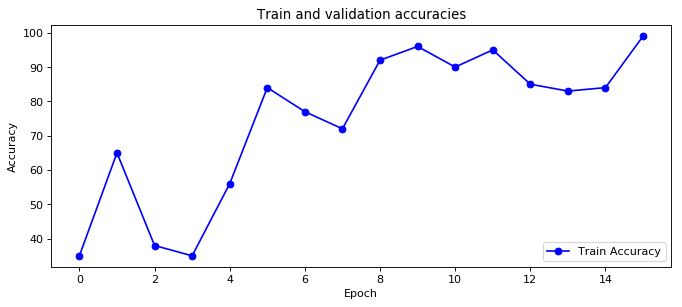

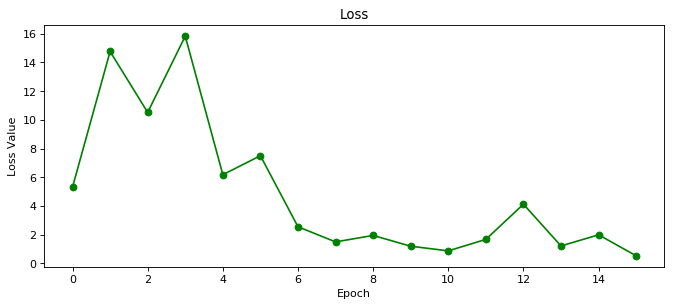

In [16]:
figure(figsize=(10, 4), dpi=80)
plt.title('Train and validation accuracies')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(train_accuracies, 'bo-')

plt.legend(["Train Accuracy"], loc ="lower right")
plt.show()


figure(figsize=(10, 4), dpi=80)
plt.title('Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.plot(total_loss, 'go-')
plt.show()

# Training the actual model:

### Splitting the data into train, validation and test sets:

In [7]:
dataset = LungCancerDataset()

# Defining the proportions of how the dataset will be split:
train_proportion = 0.6
validation_proportion = 0.2
test_proportion = 0.2

# Defining the sizes of the splits:

# 1) The train set size:
train_size = math.ceil(train_proportion * len(dataset))

# 2) The validation set size:
validation_size = math.ceil(validation_proportion * len(dataset))

# 3) The test set size:
test_size = math.floor(test_proportion * len(dataset))

# Defining the indecies of the train, validation and test sets:
all_indecies = np.random.choice(list(range(len(dataset))), (10, len(dataset) // 10), replace=False)

train_set_ind = np.random.choice(list(range(all_indecies.shape[0])), int(train_proportion * 10), replace=False)
val_set_ind = np.random.choice(list(range(all_indecies.shape[0])), int(validation_proportion * 10), replace=False)
test_set_ind = np.random.choice(list(range(all_indecies.shape[0])), int(test_proportion * 10), replace=False)

train_set_ind = np.append([], all_indecies[train_set_ind]).astype(np.int)
val_set_ind = np.append([], all_indecies[val_set_ind]).astype(np.int)
test_set_ind = np.append([], all_indecies[test_set_ind]).astype(np.int)

### Creating the train set with data augmentation:

In [15]:
augment_amount = 5000
train_set = LungCancerDataset(indecies=train_set_ind, transform=transform, augment=True, augment_amount=augment_amount)

### Plotting the data distribution:

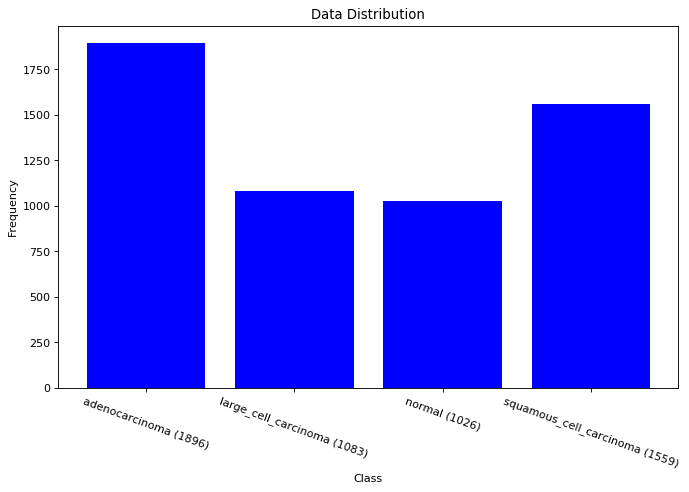

In [16]:
figure(figsize=(10, 6), dpi=80)
plt.title('Data Distribution')

data_dist = train_set.data_distribution()

y = list(data_dist.values())
x = [f'{label} ({count})' for label, count in zip(data_dist.keys(), data_dist.values())]

plt.xlabel("Class")
plt.ylabel("Frequency")
plt.bar(x, y, color='b')
plt.xticks(rotation=340)

plt.show()

### Creating the validation and test datasets:

In [17]:
validation_set = LungCancerDataset(indecies=val_set_ind, transform=transform)
test_set = LungCancerDataset(indecies=test_set_ind, transform=transform)

### Creating the DataLoaders for the train, validation and test Datasets:

In [18]:
num_workers = 4
batch_size = 16

train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size, num_workers=num_workers)
validation_loader = DataLoader(validation_set, shuffle=True, batch_size=batch_size, num_workers=num_workers)
test_loader = DataLoader(test_set, shuffle=True, batch_size=batch_size, num_workers=num_workers)

In [19]:
index = np.random.randint(0, len(train_set))
image = train_set[index][0].cpu().detach().numpy()
label = train_set[index][2]

In [20]:
print(label)
image.shape

normal


(3, 600, 800)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


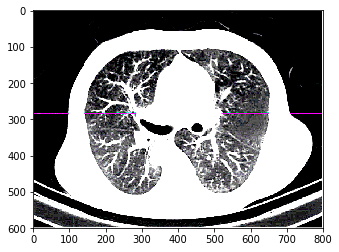

In [21]:
plt.imshow(np.transpose(image, [1, 2, 0]))

In [22]:
train_set.class_weights()

[0.7336497890295358, 1.2843951985226223, 1.3557504873294346, 0.892238614496472]

### Creating the model:

In [23]:
model = LungCancerModel(dropout_prob=0.5)

### Defining the training routine:

In [25]:
# --- Defining the optimizer: ---------------------------------------------------------------
learning_rate = 1e-3
weight_decay = 1e-5
momentum = 0.9

optimizer = optim.SGD(params=model.parameters(), lr=learning_rate,
                      momentum=momentum, weight_decay=weight_decay)

# --- Defining the loss function: -----------------------------------------------------------
weights = torch.tensor(train_set.class_weights(), dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=weights)
criterion.to(device=device)

# --- Defining the Learning Rate Scheduler: -------------------------------------------------
scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=23, gamma=0.1) # step_size=10

### Defining the number of epochs:

In [26]:
epochs = 30

In [27]:
total_loss, train_accuracies, validation_accuracies = train(model=model,
                                                            train_loader=train_loader,
                                                            validation_loader=validation_loader,
                                                            optimizer=optimizer,
                                                            criterion=criterion,
                                                            epochs=epochs,
                                                            scheduler=scheduler,
                                                            verbose=True)

  0%|          | 0/30 [00:00<?, ?it/s]

Evaluating the current epoch...


  3%|▎         | 1/30 [03:18<1:36:07, 198.87s/it]

Current learning rate: 0.001
Epoch: 0 | Loss: 1439.99 | Train accuracy: 67.86% | Validation accuracy 63.30%
Evaluating the current epoch...


  7%|▋         | 2/30 [06:51<1:36:35, 206.98s/it]

Current learning rate: 0.001
Epoch: 1 | Loss: 229.09 | Train accuracy: 71.10% | Validation accuracy 63.83%
Evaluating the current epoch...


 10%|█         | 3/30 [10:23<1:34:10, 209.28s/it]

Current learning rate: 0.001
Epoch: 2 | Loss: 132.27 | Train accuracy: 61.97% | Validation accuracy 53.72%
Evaluating the current epoch...


 13%|█▎        | 4/30 [13:37<1:28:04, 203.27s/it]

Current learning rate: 0.001
Epoch: 3 | Loss: 96.32 | Train accuracy: 91.27% | Validation accuracy 81.38%
Evaluating the current epoch...


 17%|█▋        | 5/30 [16:52<1:23:29, 200.40s/it]

Current learning rate: 0.001
Epoch: 4 | Loss: 68.08 | Train accuracy: 81.67% | Validation accuracy 80.32%
Evaluating the current epoch...


 20%|██        | 6/30 [20:18<1:20:49, 202.08s/it]

Current learning rate: 0.001
Epoch: 5 | Loss: 51.09 | Train accuracy: 89.74% | Validation accuracy 81.38%
Evaluating the current epoch...


 23%|██▎       | 7/30 [24:01<1:20:08, 209.08s/it]

Current learning rate: 0.001
Epoch: 6 | Loss: 59.56 | Train accuracy: 91.77% | Validation accuracy 87.23%
Evaluating the current epoch...


 27%|██▋       | 8/30 [27:43<1:18:07, 213.06s/it]

Current learning rate: 0.001
Epoch: 7 | Loss: 50.08 | Train accuracy: 94.91% | Validation accuracy 85.11%
Evaluating the current epoch...


 30%|███       | 9/30 [31:42<1:17:27, 221.30s/it]

Current learning rate: 0.001
Epoch: 8 | Loss: 38.20 | Train accuracy: 95.22% | Validation accuracy 88.30%
Evaluating the current epoch...


 33%|███▎      | 10/30 [35:26<1:14:02, 222.11s/it]

Current learning rate: 0.001
Epoch: 9 | Loss: 33.98 | Train accuracy: 83.25% | Validation accuracy 70.74%
Evaluating the current epoch...


 37%|███▋      | 11/30 [40:11<1:16:27, 241.42s/it]

Current learning rate: 0.001
Epoch: 10 | Loss: 30.02 | Train accuracy: 95.67% | Validation accuracy 86.70%
Evaluating the current epoch...


 40%|████      | 12/30 [43:59<1:11:08, 237.11s/it]

Current learning rate: 0.001
Epoch: 11 | Loss: 36.07 | Train accuracy: 96.78% | Validation accuracy 89.36%
Evaluating the current epoch...


 43%|████▎     | 13/30 [47:54<1:07:00, 236.49s/it]

Current learning rate: 0.001
Epoch: 12 | Loss: 29.94 | Train accuracy: 97.09% | Validation accuracy 90.43%
Evaluating the current epoch...


 47%|████▋     | 14/30 [51:52<1:03:14, 237.15s/it]

Current learning rate: 0.001
Epoch: 13 | Loss: 25.48 | Train accuracy: 95.22% | Validation accuracy 86.70%
Evaluating the current epoch...


 50%|█████     | 15/30 [55:59<59:58, 239.90s/it]  

Current learning rate: 0.001
Epoch: 14 | Loss: 21.14 | Train accuracy: 97.84% | Validation accuracy 92.55%
Evaluating the current epoch...


 53%|█████▎    | 16/30 [1:00:01<56:07, 240.57s/it]

Current learning rate: 0.001
Epoch: 15 | Loss: 25.43 | Train accuracy: 96.28% | Validation accuracy 87.77%
Evaluating the current epoch...


 57%|█████▋    | 17/30 [1:03:56<51:47, 239.01s/it]

Current learning rate: 0.001
Epoch: 16 | Loss: 23.38 | Train accuracy: 98.01% | Validation accuracy 90.43%
Evaluating the current epoch...


 60%|██████    | 18/30 [1:07:55<47:45, 238.81s/it]

Current learning rate: 0.001
Epoch: 17 | Loss: 19.28 | Train accuracy: 97.43% | Validation accuracy 89.89%
Evaluating the current epoch...


 63%|██████▎   | 19/30 [1:11:54<43:48, 238.93s/it]

Current learning rate: 0.001
Epoch: 18 | Loss: 22.30 | Train accuracy: 97.25% | Validation accuracy 89.89%
Evaluating the current epoch...


 67%|██████▋   | 20/30 [1:15:43<39:21, 236.17s/it]

Current learning rate: 0.001
Epoch: 19 | Loss: 18.89 | Train accuracy: 95.38% | Validation accuracy 86.17%
Evaluating the current epoch...


 70%|███████   | 21/30 [1:19:35<35:14, 234.92s/it]

Current learning rate: 0.001
Epoch: 20 | Loss: 19.57 | Train accuracy: 97.66% | Validation accuracy 90.96%
Evaluating the current epoch...


 73%|███████▎  | 22/30 [1:24:30<33:41, 252.72s/it]

Current learning rate: 0.001
Epoch: 21 | Loss: 17.69 | Train accuracy: 98.02% | Validation accuracy 91.49%
Evaluating the current epoch...


 77%|███████▋  | 23/30 [1:32:12<36:49, 315.71s/it]

Current learning rate: 0.001
Epoch: 22 | Loss: 16.04 | Train accuracy: 97.03% | Validation accuracy 86.70%
Evaluating the current epoch...


 80%|████████  | 24/30 [1:35:58<28:52, 288.74s/it]

Current learning rate: 0.0001
Epoch: 23 | Loss: 14.62 | Train accuracy: 97.81% | Validation accuracy 89.36%
Evaluating the current epoch...


 83%|████████▎ | 25/30 [1:39:49<22:36, 271.38s/it]

Current learning rate: 0.0001
Epoch: 24 | Loss: 13.63 | Train accuracy: 98.09% | Validation accuracy 92.02%
Evaluating the current epoch...


 87%|████████▋ | 26/30 [1:43:38<17:14, 258.69s/it]

Current learning rate: 0.0001
Epoch: 25 | Loss: 13.90 | Train accuracy: 97.84% | Validation accuracy 91.49%
Evaluating the current epoch...


 90%|█████████ | 27/30 [1:47:18<12:20, 246.99s/it]

Current learning rate: 0.0001
Epoch: 26 | Loss: 12.20 | Train accuracy: 97.75% | Validation accuracy 89.89%
Evaluating the current epoch...


 93%|█████████▎| 28/30 [1:50:59<07:58, 239.17s/it]

Current learning rate: 0.0001
Epoch: 27 | Loss: 11.76 | Train accuracy: 98.36% | Validation accuracy 93.62%
Evaluating the current epoch...


 97%|█████████▋| 29/30 [1:54:45<03:55, 235.17s/it]

Current learning rate: 0.0001
Epoch: 28 | Loss: 11.80 | Train accuracy: 98.17% | Validation accuracy 92.02%
Evaluating the current epoch...


100%|██████████| 30/30 [1:58:36<00:00, 237.20s/it]

Current learning rate: 0.0001
Epoch: 29 | Loss: 12.22 | Train accuracy: 98.01% | Validation accuracy 92.02%


## Plotting the loss and training accuracy:

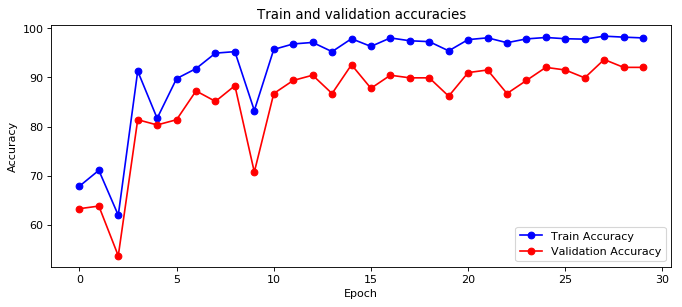

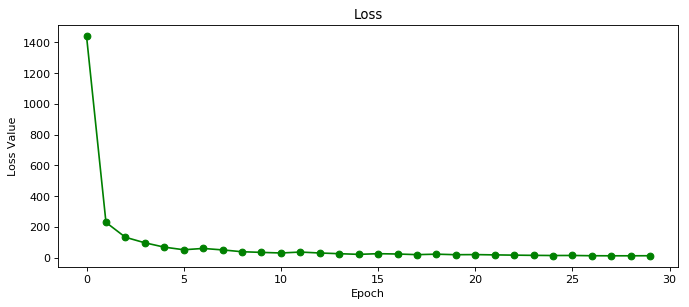

In [28]:
figure(figsize=(10, 4), dpi=80)
plt.title('Train and validation accuracies')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(train_accuracies, 'bo-')
plt.plot(validation_accuracies, 'ro-')

plt.legend(["Train Accuracy", "Validation Accuracy"], loc ="lower right")
plt.show()


figure(figsize=(10, 4), dpi=80)
plt.title('Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.plot(total_loss, 'go-')
plt.show()

### Calculating the test accuracy:

In [29]:
accuracy = evaluate(model=model, data_loader=test_loader)
print(f'Accuracy when evaluating with the test set: {accuracy:.2f}%')

Accuracy when evaluating with the test set: 99.47%


In [30]:
nb_classes = 4

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes, _) in enumerate(test_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs.float())
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

In [31]:
classes = np.unique(test_set.labels)

class_accuracies = confusion_matrix.diag()/confusion_matrix.sum(1)
class_acc_dict = dict(zip(classes, class_accuracies.tolist()))
class_acc_dict

{'adenocarcinoma': 0.9857142567634583,
 'large_cell_carcinoma': 1.0,
 'normal': 1.0,
 'squamous_cell_carcinoma': 1.0}

# Saving the model:

In [32]:
# Creating the path of the model:
path = os.getcwd()
model_name = f'model_acc_{int(accuracy)}'

MODEL_PATH = os.path.join(path, model_name)

In [33]:
# Saving the model:
torch.save(model.state_dict(), MODEL_PATH)